# Get a basic estimate for surface brightness

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# We will use astropy's WCS and ZScaleInterval for plotting
import astropy.units as u

# And also DESC packages to get the data path
import GCRCatalogs
from GCRCatalogs import GCRQuery
import desc_dc2_dm_data

import seaborn as sns

In [3]:
# We load the catalog with addons
cosmo=GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")

In [12]:
#small healpix sample for testing
for healpix in cosmo.available_healpix_pixels:
    if healpix == 9556: #, 9558, 9559, 9560, 9683, 9684, 9685, 9686, 9687, 9688, 9812, 9813, 9814, 9815, 9816, 9940, 9941, 9942, 9943, 9944, 10068, 10069, 10070, 10071, 10072, 10195,10196,10197, 10198, 10199
        quant = cosmo.get_quantities(['size_true','mag_true_r_lsst'], native_filters=f"healpix_pixel == {healpix}")


In [23]:
size = quant['size_true']*u.arcsec
mag  = quant['mag_true_r_lsst']*u.ABmag

In [26]:
flux = mag.to(u.erg/u.s/u.cm**2/u.Hz)

In [40]:
flux_hlr = flux/2. # light in half-light radius is approx half the flux
SB_hlr   = flux_hlr/(np.pi*size**2) # flux over area; flux per square arcsec


In [43]:
SB_hlr_mag  = (flux_hlr.value*(u.erg/(u.Hz*u.s*u.cm**2))).to(u.ABmag) # hack to get mag/arcsec**2 to work 

Text(0.5, 0, 'Surface brightness [mag/arcsec^2]')

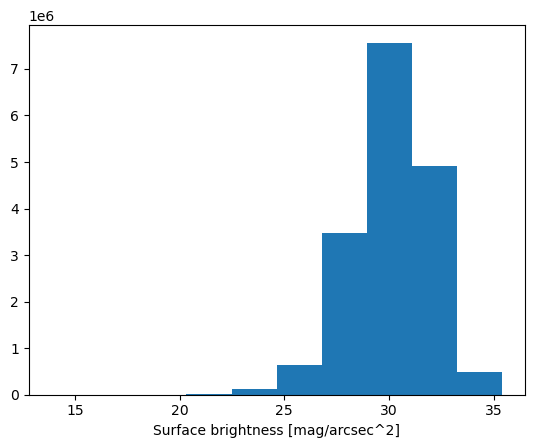

In [44]:
plt.hist(SB_hlr_mag.value)
plt.xlabel("Surface brightness [mag/arcsec^2]")